In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_excel("/content/Liver_disease_data.xlsx")

In [7]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


In [9]:
df.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


In [10]:
df.corr()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
Age,1.000000,-0.009323,0.038283,0.008236,-0.013683,-0.012948,-0.015212,0.024209,0.000678,-0.013105,0.156099
Gender,-0.009323,1.000000,0.013458,-0.003312,-0.023403,0.017394,0.009379,0.000012,0.024131,0.024603,0.189558
BMI,0.038283,0.013458,1.000000,-0.024749,-0.018322,-0.007686,-0.010888,-0.007808,-0.004850,0.043684,0.167655
AlcoholConsumption,0.008236,-0.003312,-0.024749,1.000000,-0.013794,-0.016808,-0.024232,0.013490,0.016640,-0.043480,0.349610
Smoking,-0.013683,-0.023403,-0.018322,-0.013794,1.000000,-0.007374,0.007054,0.001455,0.040314,0.000838,0.200071
GeneticRisk,-0.012948,0.017394,-0.007686,-0.016808,-0.007374,1.000000,-0.011594,-0.010785,0.018990,-0.008061,0.118292
PhysicalActivity,-0.015212,0.009379,-0.010888,-0.024232,0.007054,-0.011594,1.000000,-0.006939,0.018569,-0.010393,-0.116689
Diabetes,0.024209,0.000012,-0.007808,0.013490,0.001455,-0.010785,-0.006939,1.000000,0.049166,0.018153,0.107480
Hypertension,0.000678,0.024131,-0.004850,0.016640,0.040314,0.018990,0.018569,0.049166,1.000000,0.007847,0.170683
LiverFunctionTest,-0.013105,0.024603,0.043684,-0.043480,0.000838,-0.008061,-0.010393,0.018153,0.007847,1.000000,0.354003


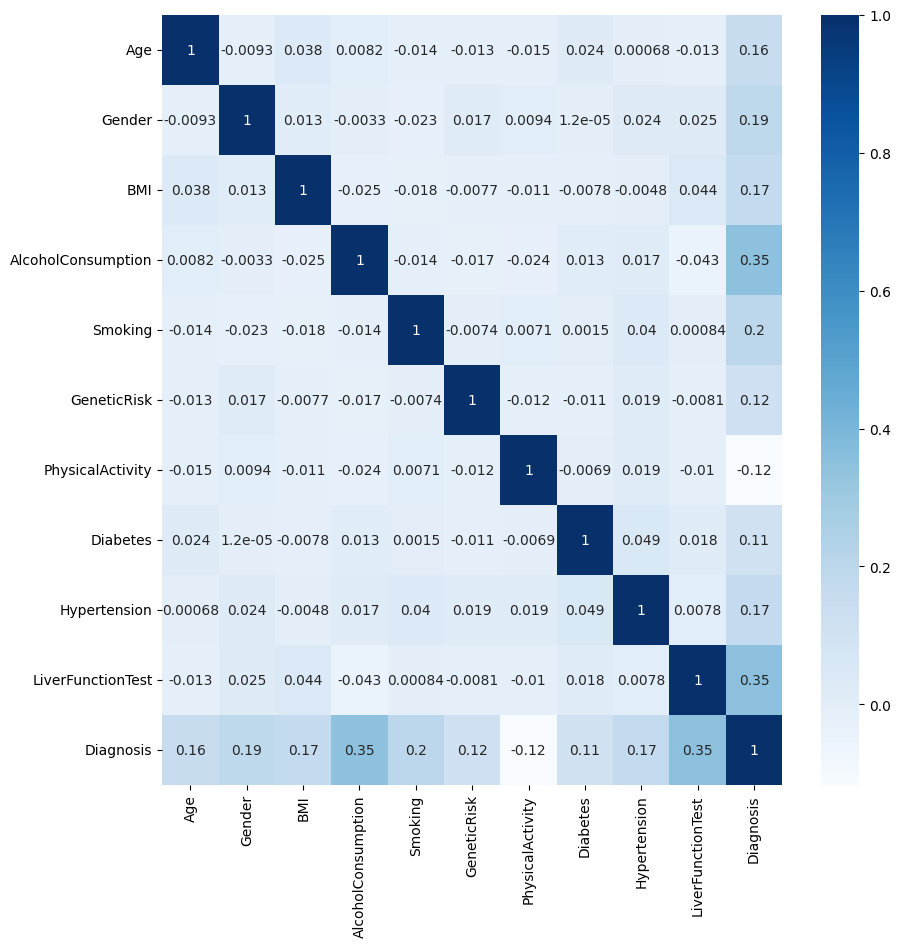

In [11]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

In [12]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [14]:
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)


Accuracy: 0.9058823529411765

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       229
           1       0.93      0.90      0.91       281

    accuracy                           0.91       510
   macro avg       0.90      0.91      0.91       510
weighted avg       0.91      0.91      0.91       510



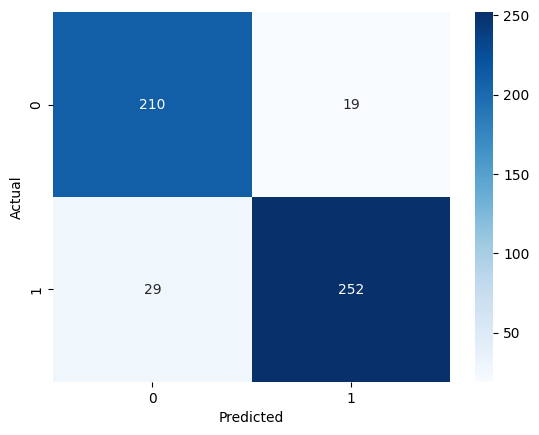

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


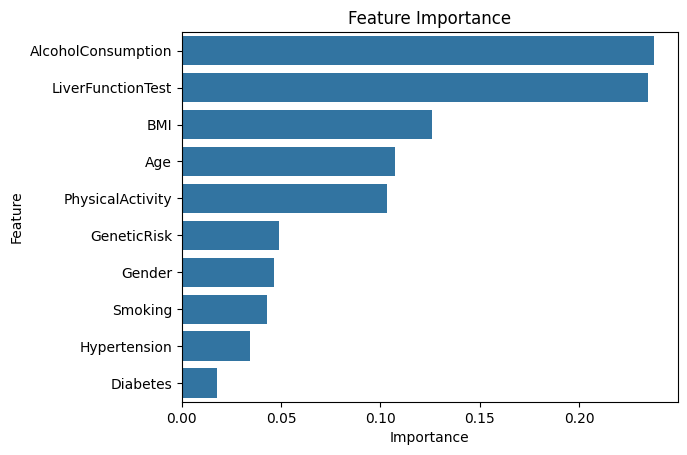

In [17]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a sorted plot
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()


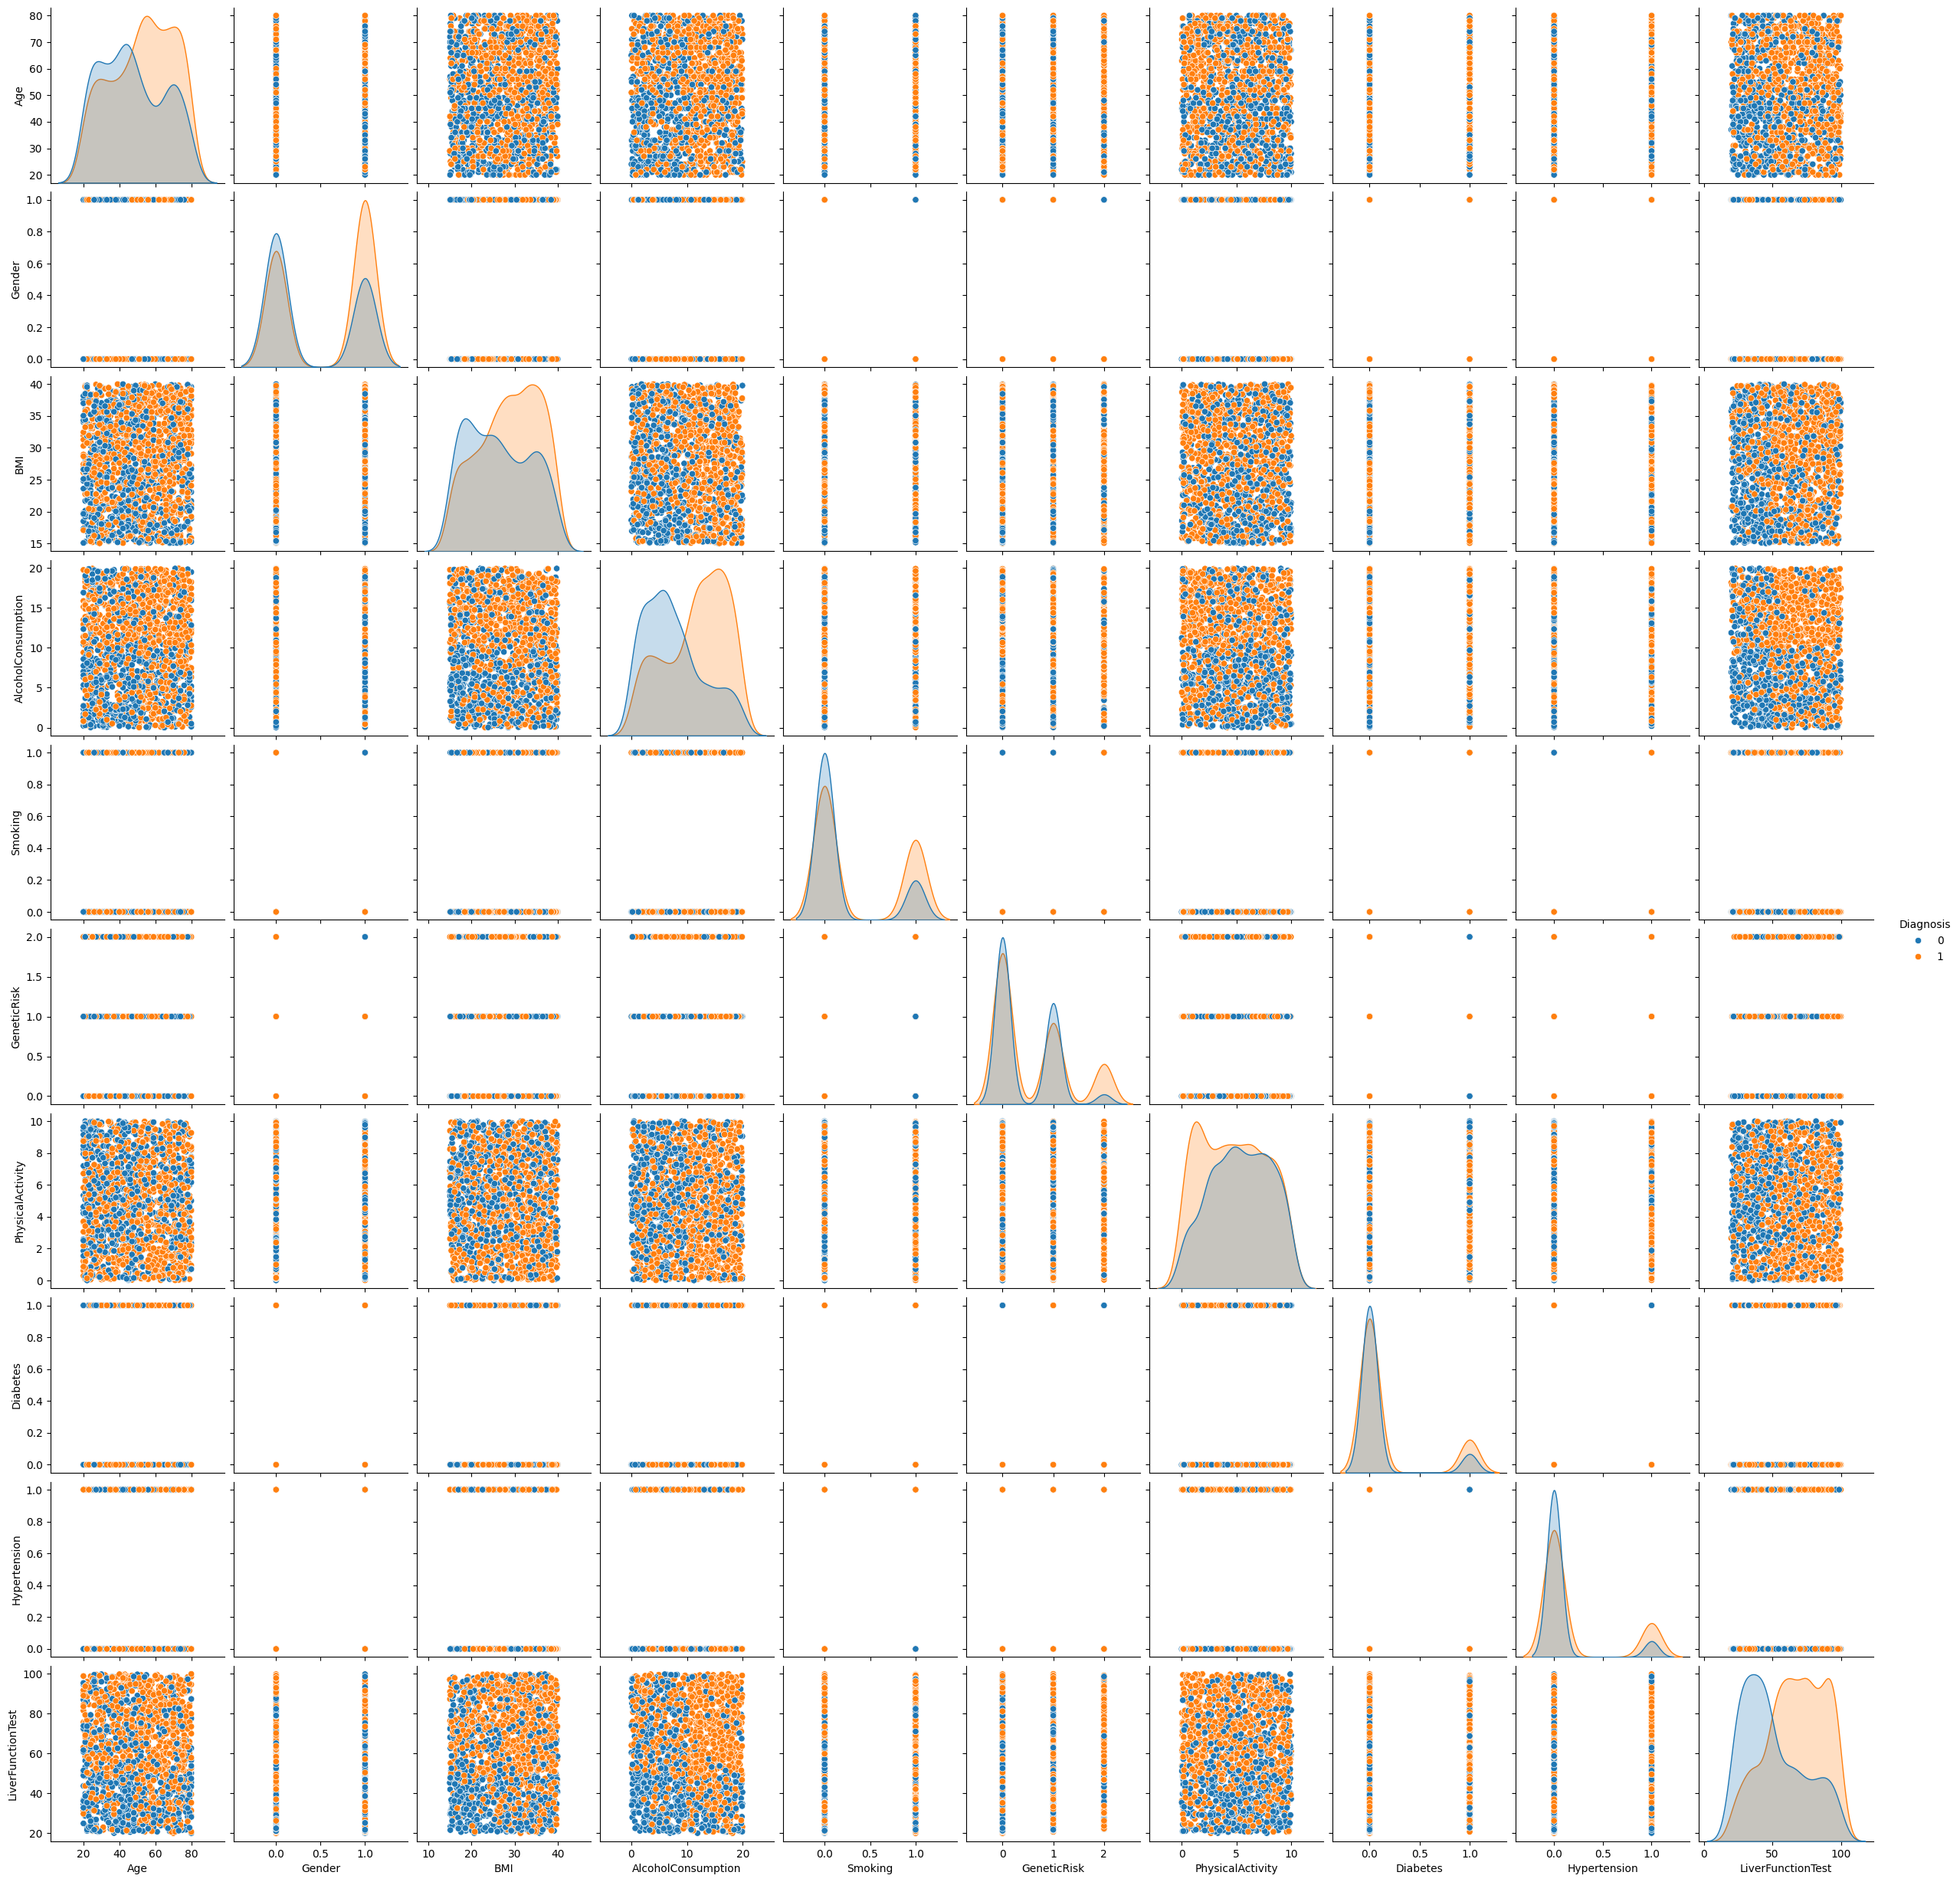

In [24]:
sns.pairplot(df, hue="Diagnosis")
plt.show()

In [26]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [27]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [67]:
streamlit_code = """
import streamlit as st
import joblib
import pandas as pd

# Load trained model
model = joblib.load('random_forest_model.joblib')

# App title
st.title("Liver Disease Diagnosis Predictor (Random Forest)")
st.write("Provide patient data below to predict the likelihood of liver disease.")

# Define feature names based on your dataset
feature_names = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking',
                 'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

# Collect user inputs
user_input = {}

st.subheader("Enter Patient Data:")

for feature in feature_names:
    if feature in ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']:
        user_input[feature] = st.number_input(f"{feature}:", value=0.0, step=0.1, key=feature)
    elif feature == 'Gender':
        gender_input = st.selectbox("Gender:", ['Male', 'Female'], key=feature)
        user_input[feature] = 1 if gender_input == 'Male' else 0
    elif feature in ['Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension']:
        user_input[feature] = st.selectbox(f"{feature} (0 = No, 1 = Yes):", [0, 1], key=feature)

# Convert inputs to a DataFrame
input_df = pd.DataFrame([user_input])

# Reorder DataFrame columns to match training data
input_df = input_df[feature_names]

# Predict button
if st.button("Predict Liver Disease"):
    try:
        prediction = model.predict(input_df)
        prediction_proba = model.predict_proba(input_df)

        st.subheader("Prediction Result:")
        if prediction[0] == 1:
            st.error("⚠️ The model predicts the patient has Liver Disease.")
        else:
            st.success("✅ The model predicts the patient does NOT have Liver Disease.")

        st.write(f"**Probability of No Liver Disease:** {prediction_proba[0][0]:.2f}")
        st.write(f"**Probability of Liver Disease:** {prediction_proba[0][1]:.2f}")

    except Exception as e:
        st.error(f"An error occurred: {e}")

# Footer info
st.subheader("About This App")
st.write("This tool uses a Random Forest Classifier trained on patient data to predict the likelihood of liver disease based on health and lifestyle factors.")



"""
#save the code to a file
with open('app.py','w')as f:
  f.write(streamlit_code)

In [68]:
!streamlit run app.py &>/content/logs.txt &

In [69]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqLnUwPAU9gjGXqxNYummeJsa5_Hvkmbru17fhPW3pDpP4r")

In [70]:

from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"streamlit App is live at: {public_url}")

streamlit App is live at: NgrokTunnel: "https://834e-34-16-219-100.ngrok-free.app" -> "http://localhost:8501"


In [66]:
!pkill -f ngrok